# Projects

Repository metrics that reflect how we are doing with respect to the standard components of integration with GitLab (badges/tests), and ReadTheDocs.

In [1]:
# include common code and config
# selected_pi = 10
%run PIQM_Bootstrap.ipynb

{'pi': 'PI10', 'id': 10, 'start': '2021-03-17T00:00:00Z', 'started': '2021-03-17', 'finish': '2021-06-15T23:59:59Z'}


In [2]:
query_api = client.query_api()
df_projects = query_api.query_data_frame(
    """from(bucket: "gitlab_metrics")
  |> range(start: 2008-03-17T00:00:00Z, stop: {0[finish]})
  |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_pipeline_duration")
  |> drop(columns:["pipeline_last_run_status", "_measurement", "license", "_field"])
  """.format(current_pi))

df_projects


result table                    _start                     _stop  \
0    _result     0 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
1    _result     1 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
2    _result     2 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
3    _result     3 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
4    _result     4 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
..       ...   ...                       ...                       ...   
165  _result   165 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
166  _result   166 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
167  _result   167 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
168  _result   168 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
169  _result   169 2008-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   

                               _time  _value got_coverage got_linting got_rtd  \
0   2019-06-12 19:40:49.861000+00:00  2569.0            0           0       0   
1   2019-07-18 08:47:30.836000+00:00    22.0            0           0       0   
2   2019-10-29 19:11:41.773000+00:00     0.0            0           0       0   
3   2019-10-30 10:34:30.930000+00:00     0.0            0           0       0   
4   2019-12-18 16:49:12.389000+00:00     0.0            0           0       0   
..                               ...     ...          ...         ...     ...   
165 2021-02-22 08:54:41.187000+00:00   166.0            1           1       1   
166 2021-04-01 11:15:39.828000+00:00   524.0            1           1       1   
167 2021-04-01 18:58:51.857000+00:00   188.0            1           1       1   
168 2018-10-24 08:40:54.932000+00:00   331.0            1           1       1   
169 2018-11-29 08:22:28.969000+00:00   436.0            1           1       1   

    got_tests        id                                            project  
0           0  12828461                ska-telescope/sdp/ska-sdp-par-model  
1           0  13372840                       ska-telescope/cpp_build_base  
2           0  15077844                   ska-telescope/CUDA_Deconvolution  
3           0  15088717             ska-telescope/sdp/sep_pipeline_imaging  
4           0  15942205                          ska-telescope/summit_demo  
..        ...       ...                                                ...  
165         1  24580625  ska-telescope/sdi/ska-ci-cd-deployment-on-stfc...  
166         1  25578388                      ska-telescope/ska-csp-lmc-mid  
167         1  25588125                   ska-telescope/ska-csp-lmc-common  
168         1   9027158                     ska-telescope/ska-tango-images  
169         1   9673989                        ska-telescope/tango-example  

[170 rows x 12 columns]

In [3]:
pis = the_pis.copy()
current = pis.pop(-1)
pi_list = ([current] + pis[: (selected_pi - select_pis) : -1])[::-1]

template_project_trace = """

{0[pi]} = from(bucket: "gitlab_metrics")
  |> range(start: {0[start]}, stop: {0[finish]})
  |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_pipeline_duration")
  |> drop(columns:["pipeline_last_run_status", "_measurement", "license", "_field"])
  |> set(key: "ID",value: "{0[id]}")
  |> set(key: "PI",value: "{0[pi]} ({0[started]})")
"""

# output all the series in reverse order
query = []
tables = ", ".join([pi["pi"] for pi in pi_list])
for pi in pi_list:
#     pi["current_start"] = last_start
    query.append(template_project_trace.format(pi))
query.append("""
union(tables: [{}])
  |> group()
  |> yield(name: "projects")
""".format(
        tables
    )
)
query = "\n".join(query)

# print(query)

query_api = client.query_api()

projects = query_api.query_data_frame(query)
# mrs = mrs[["_value", "_field"]]\
#     .rename(columns={"_value": "Merge Requests", "_field": "PI"})
projects['ID'] = projects['ID'].astype(int)
projects.sort_values(by=['ID', '_time'], ascending=[True, True], inplace=True)
projects

result table                    _start                     _stop  \
23   projects     0 2020-03-16 00:00:00+00:00 2020-06-15 23:59:59+00:00   
10   projects     0 2020-03-16 00:00:00+00:00 2020-06-15 23:59:59+00:00   
11   projects     0 2020-03-16 00:00:00+00:00 2020-06-15 23:59:59+00:00   
12   projects     0 2020-03-16 00:00:00+00:00 2020-06-15 23:59:59+00:00   
13   projects     0 2020-03-16 00:00:00+00:00 2020-06-15 23:59:59+00:00   
..        ...   ...                       ...                       ...   
102  projects     0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
96   projects     0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
97   projects     0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
98   projects     0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
99   projects     0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   

                               _time  _value got_coverage got_linting got_rtd  \
23  2020-03-16 08:52:01.236000+00:00   542.0            1           1       1   
10  2020-03-16 10:50:19.427000+00:00    64.0            0           0       1   
11  2020-03-16 10:59:01.482000+00:00   638.0            0           0       1   
12  2020-03-20 11:56:41.539000+00:00     0.0            0           0       1   
13  2020-03-20 11:57:50.044000+00:00     0.0            0           0       1   
..                               ...     ...          ...         ...     ...   
102 2021-05-05 09:14:57.518000+00:00   259.0            1           1       0   
96  2021-05-05 09:32:52.111000+00:00     0.0            0           0       0   
97  2021-05-10 08:22:17.835000+00:00    77.0            0           0       0   
98  2021-05-10 09:35:07.682000+00:00     0.0            0           0       0   
99  2021-05-20 08:05:39.046000+00:00     0.0            0           0       0   

    got_tests        id                                       project  ID  \
23          1  17509042  ska-telescope/ska-project-data-model-library   6   
10          0  17511993                    ska-telescope/pss-pipeline   6   
11          0  17512152       ska-telescope/pss-test-vector-generator   6   
12          0  17606502                        ska-telescope/aavs-daq   6   
13          0  17606533                         ska-telescope/pyfabil   6   
..        ...       ...                                           ...  ..   
102         1  26419068         ska-telescope/sdp/ska-sdp-opinterface  10   
96          0  26419536         ska-telescope/src/ska-carta-container  10   
97          0  26531497            ska-telescope/ska-tango-attributes  10   
98          0  26533391                      stvguest/ska-sdp-opflask  10   
99          0  26790066              ska-telescope/ska-low-psi-config  10   

                    PI  
23    PI6 (2020-03-16)  
10    PI6 (2020-03-16)  
11    PI6 (2020-03-16)  
12    PI6 (2020-03-16)  
13    PI6 (2020-03-16)  
..                 ...  
102  PI10 (2021-03-17)  
96   PI10 (2021-03-17)  
97   PI10 (2021-03-17)  
98   PI10 (2021-03-17)  
99   PI10 (2021-03-17)  

[105 rows x 14 columns]

In [4]:
# total projects
project_stats = projects[['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()
project_stats.sort_values(by=['ID'], ascending=[True], inplace=True)
project_stats['total'] = project_stats['id']['count']
del project_stats['id']

# projects with rtd
project_stats['rtd'] = projects[projects.got_rtd == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with coverage
project_stats['coverage'] = projects[projects.got_coverage == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with linting
project_stats['linting'] = projects[projects.got_linting == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with tests
project_stats['tests'] = projects[projects.got_tests == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

project_stats


ID                 PI total rtd coverage linting tests
                                                         
0   6   PI6 (2020-03-16)    29  13       12      12    12
1   7   PI7 (2020-06-16)    29  11       18      18    18
2   8   PI8 (2020-09-16)    20   8       15      15    15
3   9   PI9 (2020-12-17)    13   3        6       6     6
4  10  PI10 (2021-03-17)    14   2        5       5     5

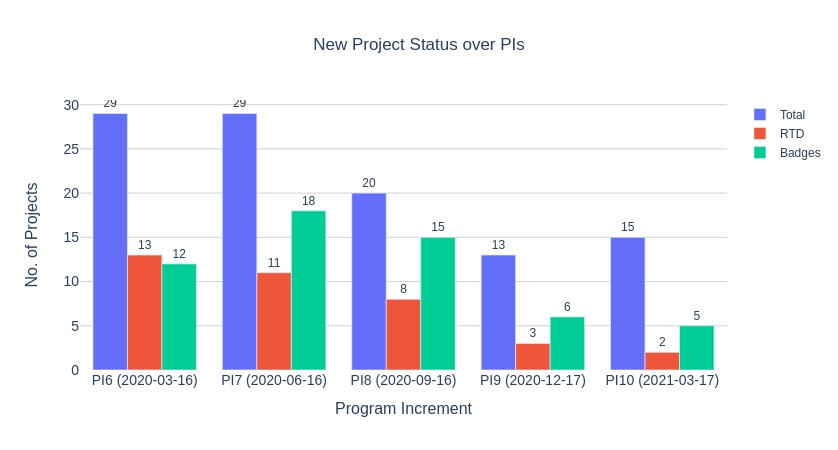

In [6]:
import plotly.graph_objects as go
stack_labels = ['{:.0f}'.format(x) for x in project_stats['total']]

fig = go.Figure(data=[go.Bar(x=project_stats.PI, y=project_stats['total'], name='Total',
     text=['{:.0f}'.format(x) for x in project_stats['total']]),
             go.Bar(x=project_stats.PI, y=project_stats['rtd'], name='RTD',
     text=['{:.0f}'.format(x) for x in project_stats['rtd']]),
             go.Bar(x=project_stats.PI, y=project_stats['linting'], name='Badges',
     text=['{:.0f}'.format(x) for x in project_stats['linting']]),         
                     ])
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_traces( textposition='outside')
fig.update_layout(barmode='group', yaxis=dict(
        title='No. of Projects',
        titlefont_size=16,
        tickfont_size=14,
    ), xaxis=dict(
        title='Program Increment',
        titlefont_size=16,
        tickfont_size=14,
    ), height=600, title='New Project Status over PIs', title_x=0.5, paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()
